# Installation of needed libaries<br>

Hier schreibt ihr eine schöne Einleitung, damit alle das Notebook und die IDee verstehen

In [6]:
import os
import glob
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#from keplergl import KeplerGl 
#import keplergl

## Data imports<br>

In [7]:
#As we have separate files for each year, we need to navigate to the four relevant filepaths
filepath2016 = 'data/2016/Unfallorte_2016_LinRef.txt'
filepath2017 = 'data/2017/Unfallorte2017_LinRef.txt'
filepath2018 = 'data/2018/Unfallorte2018_LinRef.txt'
filepath2019 = 'data/2019/Unfallorte2019_LinRef.txt'

In [8]:

#Importing the txt-files. As the data was published in Germany, we need to set the decimal as a comma. Seperate lines to avoid error message
df_2016 = pd.read_csv(filepath2016, delimiter=';',decimal=',')
df_2017 = pd.read_csv(filepath2017, delimiter=';',decimal=',')
df_2018 = pd.read_csv(filepath2018, delimiter=';',decimal=',')
df_2019 = pd.read_csv(filepath2019, delimiter=';',decimal=',')

C:\Users\franz\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data inspection<br>


In [9]:
#Data was read in successfully, data types are corecct, column number and names differ between years 
#24 columns for year 2019: "Ist_Sonstige" is named differently than in other years
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268370 entries, 0 to 268369
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OBJECTID     268370 non-null  int64  
 1   ULAND        268370 non-null  int64  
 2   UREGBEZ      268370 non-null  int64  
 3   UKREIS       268370 non-null  int64  
 4   UGEMEINDE    268370 non-null  int64  
 5   UJAHR        268370 non-null  int64  
 6   UMONAT       268370 non-null  int64  
 7   USTUNDE      268370 non-null  int64  
 8   UWOCHENTAG   268370 non-null  int64  
 9   UKATEGORIE   268370 non-null  int64  
 10  UART         268370 non-null  int64  
 11  UTYP1        268370 non-null  int64  
 12  ULICHTVERH   268370 non-null  int64  
 13  IstRad       268370 non-null  int64  
 14  IstPKW       268370 non-null  int64  
 15  IstFuss      268370 non-null  int64  
 16  IstKrad      268370 non-null  int64  
 17  IstGkfz      268370 non-null  int64  
 18  IstSonstige  268370 non-

In [10]:
#Checking the basic decriptive information about variables; information matches the provided meta data sheet ("DSB_Unfallatlas.pdf")
df_2019.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
count,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.0,268370.000000,268370.000000,268370.000000,268370.000000,...,268370.000000,268370.000000,268370.00000,268370.000000,268370.000000,268370.000000,2.683700e+05,268370.000000,268370.000000,268370.000000
mean,134185.500000,7.282833,2.853404,41.665525,63.106573,2019.0,6.701714,13.249048,4.104196,2.793207,...,0.804162,0.094262,0.13841,0.050143,0.098878,548339.049166,5.630806e+06,9.686864,50.807122,0.282185
std,77471.890209,3.585170,2.457828,25.923244,107.834334,0.0,3.266014,4.786792,1.867870,0.428173,...,0.396845,0.292193,0.34533,0.218241,0.298499,149945.409082,1.936216e+05,2.139855,1.738218,0.490314
min,1.000000,1.000000,0.000000,1.000000,0.000000,2019.0,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,280437.417648,5.247272e+06,5.867262,47.371855,0.000000
25%,67093.250000,5.000000,1.000000,15.000000,0.000000,2019.0,4.000000,10.000000,3.000000,3.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,425815.274113,5.467200e+06,7.947397,49.344931,0.000000
50%,134185.500000,7.000000,3.000000,41.000000,16.000000,2019.0,7.000000,14.000000,4.000000,3.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,528605.177549,5.650939e+06,9.412229,50.982840,0.000000
75%,201277.750000,9.000000,4.000000,62.000000,89.000000,2019.0,9.000000,17.000000,6.000000,3.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,670687.329269,5.784068e+06,11.354566,52.195599,1.000000
max,268370.000000,16.000000,9.000000,91.000000,718.000000,2019.0,12.000000,23.000000,7.000000,3.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,920355.261328,6.098627e+06,15.028683,55.033009,2.000000


In [11]:
#24 columns for year 2018, "OBJECTID" is named differently than in other years
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211868 entries, 0 to 211867
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID_1  211868 non-null  int64  
 1   ULAND       211868 non-null  int64  
 2   UREGBEZ     211868 non-null  int64  
 3   UKREIS      211868 non-null  int64  
 4   UGEMEINDE   211868 non-null  int64  
 5   UJAHR       211868 non-null  int64  
 6   UMONAT      211868 non-null  int64  
 7   USTUNDE     211868 non-null  int64  
 8   UWOCHENTAG  211868 non-null  int64  
 9   UKATEGORIE  211868 non-null  int64  
 10  UART        211868 non-null  int64  
 11  UTYP1       211868 non-null  int64  
 12  ULICHTVERH  211868 non-null  int64  
 13  IstRad      211868 non-null  int64  
 14  IstPKW      211868 non-null  int64  
 15  IstFuss     211868 non-null  int64  
 16  IstKrad     211868 non-null  int64  
 17  IstGkfz     211868 non-null  int64  
 18  IstSonstig  211868 non-null  int64  
 19  ST

In [12]:
#24 columns for year 2017, "IstGkfz" is missing, "UIDENTSTLA" is redundant, "LICHT" is named differently
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195229 entries, 0 to 195228
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID    195229 non-null  int64  
 1   UIDENTSTLA  195229 non-null  object 
 2   ULAND       195229 non-null  int64  
 3   UREGBEZ     195229 non-null  int64  
 4   UKREIS      195229 non-null  int64  
 5   UGEMEINDE   195229 non-null  int64  
 6   UJAHR       195229 non-null  int64  
 7   UMONAT      195229 non-null  int64  
 8   USTUNDE     195229 non-null  int64  
 9   UWOCHENTAG  195229 non-null  int64  
 10  UKATEGORIE  195229 non-null  int64  
 11  UART        195229 non-null  int64  
 12  UTYP1       195229 non-null  int64  
 13  IstRad      195229 non-null  int64  
 14  IstPKW      195229 non-null  int64  
 15  IstFuss     195229 non-null  int64  
 16  IstKrad     195229 non-null  int64  
 17  IstSonstig  195229 non-null  int64  
 18  LICHT       195229 non-null  int64  
 19  ST

In [13]:
#25 columns for year 2016, "FID" is redundand
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151673 entries, 0 to 151672
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FID         151673 non-null  int64  
 1   OBJECTID    151673 non-null  int64  
 2   ULAND       151673 non-null  int64  
 3   UREGBEZ     151673 non-null  int64  
 4   UKREIS      151673 non-null  int64  
 5   UGEMEINDE   151673 non-null  int64  
 6   UJAHR       151673 non-null  int64  
 7   UMONAT      151673 non-null  int64  
 8   USTUNDE     151673 non-null  int64  
 9   UWOCHENTAG  151673 non-null  int64  
 10  UKATEGORIE  151673 non-null  int64  
 11  UART        151673 non-null  int64  
 12  UTYP1       151673 non-null  int64  
 13  ULICHTVERH  151673 non-null  int64  
 14  IstStrasse  151673 non-null  int64  
 15  IstRad      151673 non-null  int64  
 16  IstPKW      151673 non-null  int64  
 17  IstFuss     151673 non-null  int64  
 18  IstKrad     151673 non-null  int64  
 19  Is

## Adjusting structure of individual data sheets<br>


In [14]:
df_2019.rename(columns={'IstSonstige': 'IstSonstig'}, inplace=True)
#checking if the changes worked
#df_2019.info()

In [15]:
df_2018.rename(columns={'OBJECTID_1': 'OBJECTID'}, inplace=True)

#checking if the changes worked
#df_2018.info()

In [16]:
df_2017.drop(df_2017.columns[1], axis=1, inplace=True)
df_2017.rename(columns={'LICHT': 'ULICHTVERH'}, inplace=True)
#checking if the changes worked
#df_2017.info()

In [17]:
#delete the unnecessary columns
df_2016.rename(columns={'IstStrasse': 'STRZUSTAND'}, inplace=True)
df_2016.drop('FID', axis=1, inplace=True)

#checking if the changes worked
#df_2016.info()


## Combining data to one dataframe<br>

In [18]:

# new dataframe (alle Jahre)
dfs = [df_2016, df_2017, df_2018, df_2019]
df_concat = pd.concat(dfs)

In [19]:
df_concat.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
count,827140.00000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,...,827140.000000,827140.000000,827140.000000,827140.000000,631911.000000,827140.000000,827140.000000,8.271400e+05,827140.000000,827140.000000
mean,107618.05428,7.485727,2.780850,41.650878,74.444528,2017.721686,6.719216,13.267426,4.100752,2.790679,...,0.260616,0.810794,0.088249,0.143469,0.051327,0.109625,572632.521999,5.599999e+06,10.027290,50.530884
std,66672.85815,3.522928,2.251166,25.728318,114.846793,1.102954,3.235969,4.805245,1.870905,0.431494,...,0.438971,0.391673,0.283656,0.350551,0.220664,0.312422,137264.422787,2.098906e+05,1.945821,1.885294
min,1.00000,1.000000,0.000000,1.000000,0.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,280437.417648,5.241408e+06,5.867262,47.319139
25%,51697.00000,5.000000,1.000000,16.000000,0.000000,2017.000000,4.000000,10.000000,3.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,469496.977473,5.416158e+06,8.572734,48.887208
50%,103393.00000,8.000000,3.000000,37.000000,22.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,557899.386100,5.561991e+06,9.835611,50.201155
75%,156228.00000,9.000000,4.000000,62.000000,118.000000,2019.000000,9.000000,17.000000,6.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,683057.177227,5.784633e+06,11.515268,52.198256
max,268370.00000,16.000000,9.000000,91.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,920449.234500,6.099069e+06,15.028683,55.036932


## Filtering relevant data for the project<br>

In [20]:
#Filtering only data from Hamburg and bike accidents
df = df_concat.loc[(df_concat['IstRad'] == 1) & (df_concat['ULAND']==2)]

In [21]:
df.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
count,9019.000000,9019.0,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,...,9019.0,9019.000000,9019.000000,9019.000000,6839.000000,9019.000000,9019.000000,9.019000e+03,9019.000000,9019.000000
mean,114268.746757,2.0,3.336179,6.573013,348.808848,2017.525225,6.855305,13.233285,4.062535,2.905200,...,1.0,0.681894,0.082271,0.010201,0.020471,0.088480,566613.368278,5.936381e+06,10.005960,53.572028
std,42798.115215,0.0,1.702043,4.626534,168.811413,1.118456,2.949343,4.578789,1.696236,0.297089,...,0.0,0.465767,0.274792,0.100488,0.141615,0.284007,5714.901154,5.022940e+03,0.086317,0.045124
min,6023.000000,2.0,1.000000,1.000000,101.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,549085.167200,5.917209e+06,9.741474,53.397676
25%,97697.000000,2.0,2.000000,3.000000,212.000000,2017.000000,5.000000,9.000000,3.000000,3.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,563113.830901,5.934276e+06,9.953118,53.553348
50%,124491.000000,2.0,3.000000,5.000000,320.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,...,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,565984.564800,5.936364e+06,9.996110,53.572078
75%,128307.000000,2.0,5.000000,9.000000,508.000000,2019.000000,9.000000,17.000000,5.000000,3.000000,...,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,569968.091350,5.939114e+06,10.056940,53.596609
max,163331.000000,2.0,7.000000,20.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,584611.109122,5.952865e+06,10.273421,53.719033


In [23]:
#Making the data more "readable" with clear names instead of number codes
#Renaming districs
df.loc[df["UREGBEZ"]==1, "UREGBEZ"] = "HH-Mitte"
df.loc[df["UREGBEZ"]==2, "UREGBEZ"] = "Altona"
df.loc[df['UREGBEZ']==3, "UREGBEZ"] = "Eimsbüttel"
df.loc[df['UREGBEZ']==4, "UREGBEZ"] = "HH-Nord"
df.loc[df['UREGBEZ']==5, "UREGBEZ"] = "Wandsbek"
df.loc[df['UREGBEZ']==6, "UREGBEZ"] = "Bergdorf"
df.loc[df['UREGBEZ']==7, "UREGBEZ"] = "Harburg"

In [24]:
#NICHT SICHER OB DAS DIE ANALYSE DANACH VERHINDERT!!

#Renaming the accident category
#df.loc[df["UKATEGORIE"]==1, "UREGBEZ"] = "accident with fatalities"
#df.loc[df["UKATEGORIE"]==2, "UREGBEZ"] = "accident with serious injuries"
#df.loc[df["UKATEGORIE"]==3, "UREGBEZ"] = "accident with minor injuries"

In [25]:
print(df)

        OBJECTID  ULAND     UREGBEZ  UKREIS  UGEMEINDE  UJAHR  UMONAT  \
6188        6189      2    Bergdorf       2        603   2016       4   
6572        6573      2     HH-Nord       2        405   2016       2   
6589        6590      2     HH-Nord       8        418   2016       3   
6606        6607      2  Eimsbüttel       6        318   2016       3   
6695        6696      2      Altona       9        221   2016       1   
...          ...    ...         ...     ...        ...    ...     ...   
163316    163317      2      Altona       5        215   2019      12   
163319    163320      2    HH-Mitte      18        139   2019      12   
163321    163322      2  Eimsbüttel       2        312   2019      12   
163323    163324      2     Harburg      14        715   2019      12   
163330    163331      2    Wandsbek       5        513   2019      12   

        USTUNDE  UWOCHENTAG  UKATEGORIE  ...  IstRad  IstPKW  IstFuss  \
6188         15           2           3  ...      

In [26]:
#Exporting data as a single file
#df.to_csv(r'merged_data_all_years.csv', index = False, sep=";")

### Describe data<br>


<AxesSubplot:xlabel='UMONAT', ylabel='count'>

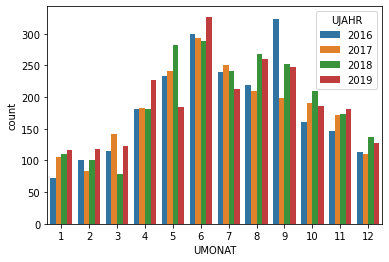

In [27]:
sns.countplot(x="UMONAT", hue="UJAHR", data=df)

<AxesSubplot:xlabel='UMONAT', ylabel='count'>

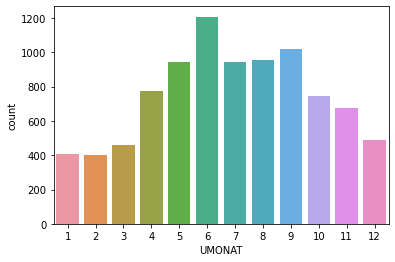

In [28]:
sns.countplot(data=df, x="UMONAT")

# Heatmap<br>

In [29]:
#Configuration of the map
config = {
'version': 'v1',
'config': {
    'mapState': {
        'latitude': 53.6,
        'longitude': 10,
        'zoom': 8
    }}}


In [17]:
#load the map 
map_1 = KeplerGl(height=800, data={"data_1": df}, config=config, )

NameError: name 'KeplerGl' is not defined

In [1]:
#show the map
#it is important to select a layer
map_1

NameError: name 'map_1' is not defined